In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
QVI=pd.read_csv('C:/Users/xiaoyuwan/OneDrive/unimelb/pythonlecture unimelb/machine_learning/Quan-Simu/QVI_data.csv')
QVI.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [21]:
QVI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


The client has selected store numbers 77, 86 and 88 as trial stores and want control stores to be established stores that are operational for the entire observation period. We would want to match trial stores to control stores that are similar to the trial store prior to the trial period of Feb 2019 in terms of :- Monthly overall sales revenue- Monthly number of customers- Monthly number of transactions per customer Let's first create the metrics of interest and filter to stores that are present The client has selected store numbers 77, 86 and 88 as trial stores and want control stores to be established stores that are operational for the entire observation period. We would want to match trial stores to control stores that are similar to the trial store prior to the trial period of Feb 2019 in terms of :- Monthly overall sales revenue- Monthly number of customers- Monthly number of transactions per customer Let's first create the metrics of interest and filter to stores that are present throughout the pre-trial period.

In [22]:
QVI['DATE']=pd.to_datetime(QVI['DATE'])
QVI['YEARandMONTH']=QVI['DATE'].dt.to_period('M')
QVI.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,YEARandMONTH
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,2018-10
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,2018-09
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,2019-03
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,2019-03
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,2018-11


Next, we define the measure calculations to use during the analysis.

In [23]:
measureOverTime=(
    QVI.groupby(['STORE_NBR','YEARandMONTH'], as_index=False)
    .agg({'TOT_SALES':'sum',
          'LYLTY_CARD_NBR':'nunique',
          'TXN_ID':'nunique',
          'PROD_QTY':'sum'}))
measureOverTime.columns=['STORE_NBR','YEARandMONTH','TOT_SALES','nCustomers','nTxns','nUnits']
measureOverTime['nChipsPerTxn']=measureOverTime['nUnits']/measureOverTime['nCustomers']
measureOverTime['nTxnperCust']=measureOverTime['nTxns']/measureOverTime['nCustomers']
measureOverTime['avgPricePerUnit'] = measureOverTime['TOT_SALES'] / measureOverTime['nUnits']
measureOverTime.drop(columns=['nUnits','nTxns'], inplace=True)
measureOverTime.sort_values(by=['STORE_NBR', 'YEARandMONTH'], inplace=True)

measureOverTime

,STORE_NBR,YEARandMONTH,TOT_SALES,nCustomers,nChipsPerTxn,nTxnperCust,avgPricePerUnit
0,1,2018-07,206.9,49,1.265306,1.061224,3.337097
1,1,2018-08,176.1,42,1.285714,1.023810,3.261111
2,1,2018-09,278.8,59,1.271186,1.050847,3.717333
3,1,2018-10,188.1,44,1.318182,1.022727,3.243103
4,1,2018-11,192.6,46,1.239130,1.021739,3.378947
...,...,...,...,...,...,...,...
3164,272,2019-02,395.5,45,2.022222,1.066667,4.346154
3165,272,2019-03,442.3,50,2.020000,1.060000,4.379208
3166,272,2019-04,445.1,54,1.944444,1.018519,4.239048
3167,272,2019-05,314.6,34,2.088235,1.176471,4.430986


In [24]:
measureOverTime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3169 entries, 0 to 3168
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype    
---  ------           --------------  -----    
 0   STORE_NBR        3169 non-null   int64    
 1   YEARandMONTH     3169 non-null   period[M]
 2   TOT_SALES        3169 non-null   float64  
 3   nCustomers       3169 non-null   int64    
 4   nChipsPerTxn     3169 non-null   float64  
 5   nTxnperCust      3169 non-null   float64  
 6   avgPricePerUnit  3169 non-null   float64  
dtypes: float64(4), int64(2), period[M](1)
memory usage: 173.4 KB


In [25]:
store_count=(
    measureOverTime[measureOverTime['YEARandMONTH']<='2019-02']
    .groupby('STORE_NBR')['YEARandMONTH']
    .count()
    .reset_index()
)
storesWithFullObs=store_count[store_count['YEARandMONTH']==12]['STORE_NBR']
preTrialMeasures=measureOverTime[measureOverTime['STORE_NBR'].isin(storesWithFullObs)]
preTrialMeasures=measureOverTime[measureOverTime['YEARandMONTH']<'2019-02']
preTrialMeasures

,STORE_NBR,YEARandMONTH,TOT_SALES,nCustomers,nChipsPerTxn,nTxnperCust,avgPricePerUnit
0,1,2018-07,206.9,49,1.265306,1.061224,3.337097
1,1,2018-08,176.1,42,1.285714,1.023810,3.261111
2,1,2018-09,278.8,59,1.271186,1.050847,3.717333
3,1,2018-10,188.1,44,1.318182,1.022727,3.243103
4,1,2018-11,192.6,46,1.239130,1.021739,3.378947
...,...,...,...,...,...,...,...
3159,272,2018-09,304.7,32,2.218750,1.125000,4.291549
3160,272,2018-10,430.6,44,2.250000,1.136364,4.349495
3161,272,2018-11,376.2,41,2.121951,1.097561,4.324138
3162,272,2018-12,403.9,47,1.893617,1.000000,4.538202


Now we need to work out a way of ranking how similar each potential control store is to the trial store. We can calculate how correlated the performance of each store is to the trial store. Let's write a function for this so that we don't have to calculate this for each trial store and control store pair.

Let's define inputTable as a metric table with potential comparison stores, metricCol as the store metric used to calculate correlation on, and storeComparison as the store number of the trial store.

In [26]:
def calculateCorrelation(inputTable, metricCol, storeComparison):
    corr_list=[]
    comp_data=inputTable.loc[
        inputTable['STORE_NBR']==storeComparison,
        ['YEARandMONTH',metricCol]]
    comp_data=comp_data.rename(columns={metricCol:'comp_metric'})
    storeNumbers=inputTable['STORE_NBR'].unique()
    for s in storeNumbers:
        if s==storeComparison:
            continue
        temp_data=inputTable.loc[inputTable['STORE_NBR']==s,['YEARandMONTH',metricCol]]
        merged=pd.merge(comp_data,temp_data,on='YEARandMONTH',how='inner')
        if len(merged)>1:
            c=merged['comp_metric'].corr(merged[metricCol])	
        else:c=np.nan 
        corr_list.append({'Store1':storeComparison,'Store2':s,'Corr':c})
    return pd.DataFrame(corr_list)


Apart from correlation, we can also calculate a standardised metric based on the absolute difference between the trial store's performance and each control store's performance. Let's write a function for this.

In [27]:
def calculateMagnitudeDistance(inputTable,metricCol,storeComparison):
    rows=[]
    storeNumbers=inputTable['STORE_NBR'].unique()
    comp_df=inputTable[inputTable['STORE_NBR']==storeComparison]
    comp_df=comp_df[['YEARandMONTH',metricCol]].rename(columns={metricCol:'comp_metric'})
    rows=[]
    for s in storeNumbers:
        if s==storeComparison:
            continue
        store_df=inputTable[inputTable['STORE_NBR']==s][['YEARandMONTH',metricCol]]
        merged=pd.merge(comp_df, store_df, on='YEARandMONTH', how='inner')
        merged['abs_diff']=(merged['comp_metric']-merged[metricCol]).abs()
        min_diff=merged['abs_diff'].min()
        max_diff=merged['abs_diff'].max() if merged['abs_diff'].max() !=0 else 1
        if max_diff==min_diff:
            mag=1
        else:
            merged['magnitudeMeasure']=1-((merged['abs_diff']-min_diff)/(max_diff-min_diff))
            mag=merged['magnitudeMeasure'].mean()
        rows.append({'Store1':storeComparison,'Store2':s,'Magnitude':mag})
    return pd.DataFrame(rows)
    
        

In [28]:
trial_store=77
corr_nSales=calculateCorrelation(preTrialMeasures,'TOT_SALES',trial_store)
corr_nSales

,Store1,Store2,Corr
0,77,1,0.075218
1,77,2,-0.263079
2,77,3,0.806644
3,77,4,-0.263300
4,77,5,-0.110652
...,...,...,...
265,77,268,0.344757
266,77,269,-0.315730
267,77,270,0.315430
268,77,271,0.355487


In [29]:
corr_nCustomers=calculateCorrelation(preTrialMeasures,'nCustomers',trial_store)
corr_nCustomers

c:\Users\xiaoyuwan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\xiaoyuwan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\xiaoyuwan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\xiaoyuwan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,Store1,Store2,Corr
0,77,1,0.322168
1,77,2,-0.572051
2,77,3,0.834207
3,77,4,-0.295639
4,77,5,0.370659
...,...,...,...
265,77,268,0.369517
266,77,269,-0.474293
267,77,270,-0.131259
268,77,271,0.019629


In [30]:
magnitude_nSales=calculateMagnitudeDistance(preTrialMeasures,'TOT_SALES',trial_store)
magnitude_nSales

,Store1,Store2,Magnitude
0,77,1,0.408163
1,77,2,0.590119
2,77,3,0.522914
3,77,4,0.644934
4,77,5,0.516320
...,...,...,...
265,77,268,0.429787
266,77,269,0.559099
267,77,270,0.591547
268,77,271,0.341091


In [31]:
magnitude_nCustomers=calculateMagnitudeDistance(preTrialMeasures,'nCustomers', trial_store)
magnitude_nCustomers

,Store1,Store2,Magnitude
0,77,1,0.663866
1,77,2,0.471429
2,77,3,0.489796
3,77,4,0.498258
4,77,5,0.512605
...,...,...,...
265,77,268,0.571429
266,77,269,0.484472
267,77,270,0.536680
268,77,271,0.328571


Now let's use the functions to find the control stores! We'll select control stores based on how similar monthly total sales in dollar amounts and monthly number of customers are to the trial stores. So we will need to use our functions to get four scores, two for each of total sales and total customers.

In [32]:
corr_weight=0.5
score_nSales = pd.merge(corr_nSales, magnitude_nSales, on=['Store1','Store2'], how='inner')
score_nSales.columns=['Store1', 'Store2','corr_measure','mag_measure']

score_nSales['scoreNSales'] = (corr_weight*score_nSales['corr_measure'] 
                               + (1-corr_weight)*score_nSales['mag_measure'])

score_nCustomers = pd.merge(corr_nCustomers, magnitude_nCustomers, on=['Store1','Store2'], how='inner')
score_nCustomers.columns=['Store1', 'Store2','corr_measure','mag_measure']
score_nCustomers['scoreNCust'] = (corr_weight*score_nCustomers['corr_measure'] 
                                  + (1-corr_weight)*score_nCustomers['mag_measure'])

score_Control = pd.merge(score_nSales[['Store1','Store2','scoreNSales']], 
                         score_nCustomers[['Store1','Store2','scoreNCust']],
                         on=['Store1','Store2'], how='inner')

score_Control['finalControlScore'] = (score_Control['scoreNSales']*0.5 
                                      + score_Control['scoreNCust']*0.5)

candidate_controls = score_Control[score_Control['Store1'] == trial_store].copy()
candidate_controls = candidate_controls[candidate_controls['Store2'] != trial_store]
candidate_controls.sort_values('finalControlScore', ascending=False, inplace=True)

control_store = candidate_controls.iloc[0]['Store2']  
print(f"Best control store for trial store {trial_store} is {control_store}")


Best control store for trial store 77 is 233.0


Now that we have found a control store, let's check visually if the drivers are indeed similar in the period before the trial.

We'll look at total sales first.

C:\Users\xiaoyuwan\AppData\Local\Temp\ipykernel_58328\1568206805.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pastSales['YEARandMONTH']=pastSales['YEARandMONTH'].dt.to_timestamp()


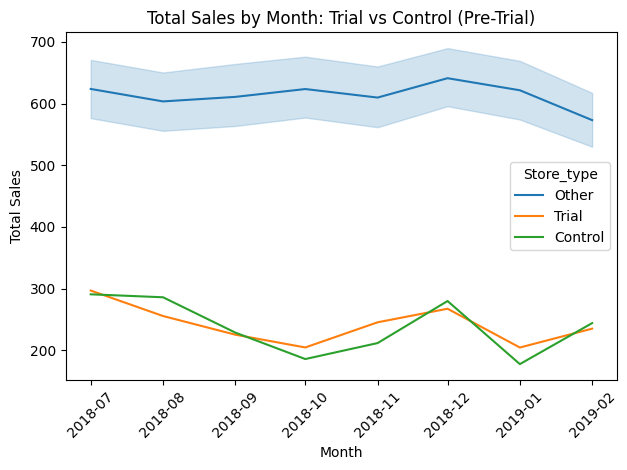

In [39]:
measureOverTime['YEARandMONTH1'] = measureOverTime['YEARandMONTH'].dt.strftime("%Y%m").astype("int")

trial_store = 77
control_store = 233
measureOverTime['Store_type'] = measureOverTime['STORE_NBR'].apply(
    lambda x: 'Trial' if x == trial_store else 'Control' if x == control_store else 'Other'
)


pastSales = measureOverTime[
    
    (measureOverTime['YEARandMONTH'] <'2019-03')
]
pastSales['YEARandMONTH']=pastSales['YEARandMONTH'].dt.to_timestamp()
pastSales

sns.lineplot(data=pastSales, x='YEARandMONTH', y='TOT_SALES', hue='Store_type')
plt.title("Total Sales by Month: Trial vs Control (Pre-Trial)")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





Great, sales are trending in a similar way. Next, number of customers.

C:\Users\xiaoyuwan\AppData\Local\Temp\ipykernel_75072\116595258.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pastCustomers['YEARandMONTH']=pastCustomers['YEARandMONTH'].dt.to_timestamp()


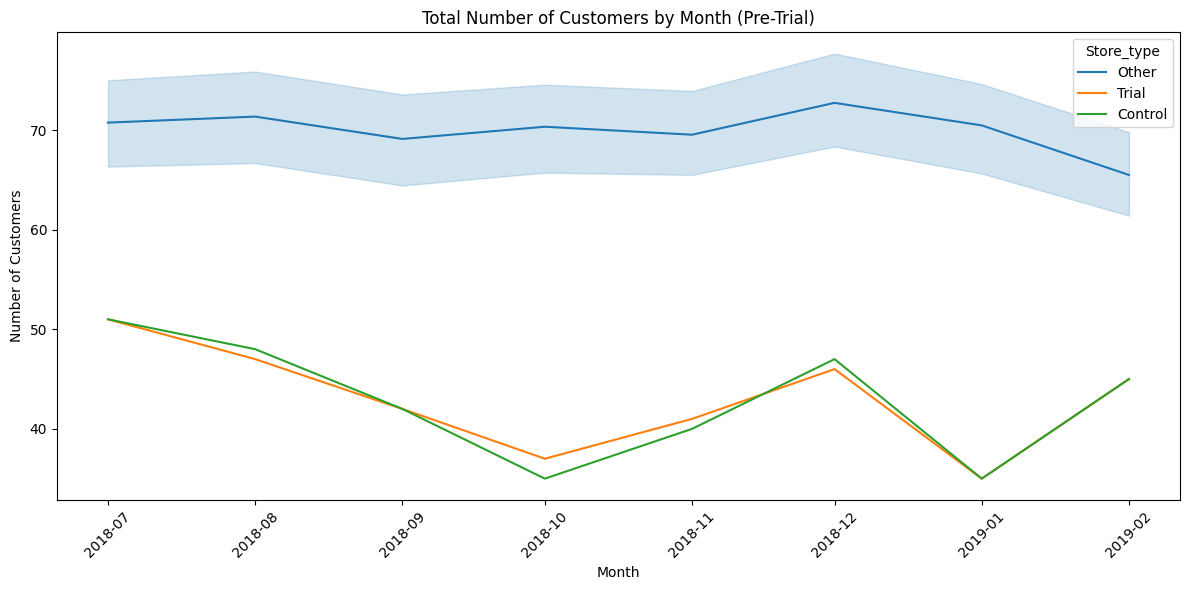

In [ ]:
pastCustomers = measureOverTime[
    
    (measureOverTime['YEARandMONTH'] < '2019-03')
]
pastCustomers['YEARandMONTH']=pastCustomers['YEARandMONTH'].dt.to_timestamp()
plt.figure(figsize=(12, 6))
sns.lineplot(data=pastCustomers, x='YEARandMONTH', y='nCustomers', hue='Store_type')
plt.title("Total Number of Customers by Month (Pre-Trial)")
plt.xlabel("Month")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Good, the trend in number of customers is also similar.
Let’s now assess the impact of the trial on sales.

In [ ]:
preTrialStoreSales = preTrialMeasures.loc[
    (preTrialMeasures['STORE_NBR'] == trial_store),
    'TOT_SALES'
].sum()

preTrialControlSales = preTrialMeasures.loc[
    (preTrialMeasures['STORE_NBR'] == control_store),
    'TOT_SALES'
].sum()

scalingFactorForControlSales = preTrialStoreSales / preTrialControlSales

measureOverTimeSales = measureOverTime.copy()
measureOverTimeSales['controlSales'] = np.where(
    measureOverTimeSales['STORE_NBR'] == control_store,
    measureOverTimeSales['TOT_SALES'] * scalingFactorForControlSales,
    np.nan
)

trialSales = measureOverTimeSales.loc[measureOverTimeSales['STORE_NBR'] == trial_store, 
                                      ['YEARandMONTH','TOT_SALES']].rename(columns={'TOT_SALES':'trialSales'})
controlSales = measureOverTimeSales.loc[measureOverTimeSales['STORE_NBR'] == control_store,
                                        ['YEARandMONTH','controlSales']]

comparison_df = pd.merge(trialSales, controlSales, on='YEARandMONTH', how='inner')


comparison_df['percentageDiff'] = abs(comparison_df['trialSales'] - comparison_df['controlSales']) / comparison_df['controlSales']

comparison_df['YEARandMONTH']=comparison_df['YEARandMONTH'].dt.strftime("%Y%m").astype("int")
pre_trial_mask = comparison_df['YEARandMONTH']<201902
stdDev = comparison_df.loc[pre_trial_mask, 'percentageDiff'].std(ddof=1)
degreesOfFreedom = 7 

trial_mask = (comparison_df['YEARandMONTH'] >= 201902) & (comparison_df['YEARandMONTH'] <= 201904)

trial_period_df = comparison_df[trial_mask].copy()
trial_period_df['tValue'] = (trial_period_df['percentageDiff'] - 0) / stdDev  # hypothetical mu=0

print("\nTrial period comparison (Store", trial_store, "vs Control", control_store, "):")
print(trial_period_df)


Trial period comparison (Store 77 vs Control 233 ):
   YEARandMONTH  trialSales  controlSales  percentageDiff     tValue
7        201902       235.0    249.762622        0.059107   1.183534
8        201903       278.5    203.802205        0.366521   7.339116
9        201904       263.5    162.345704        0.623080  12.476373


In [ ]:
from scipy.stats import t
critical_t=t.ppf(0.95, df=7)
critical_t

1.894578605061305

In [ ]:
critical_t=t.ppf(0.05, df=7)
critical_t

-1.8945786050613054

We can observe that the t-value is much larger than the 95th percentile value of the t-distribution for March and April - i.e. the increase in sales in the trial store in March and April is statistically greater than in the control store.

Let's create a more visual version of this by plotting the sales of the control store, the sales of the trial stores and the 95th percentile value of sales of the control store.

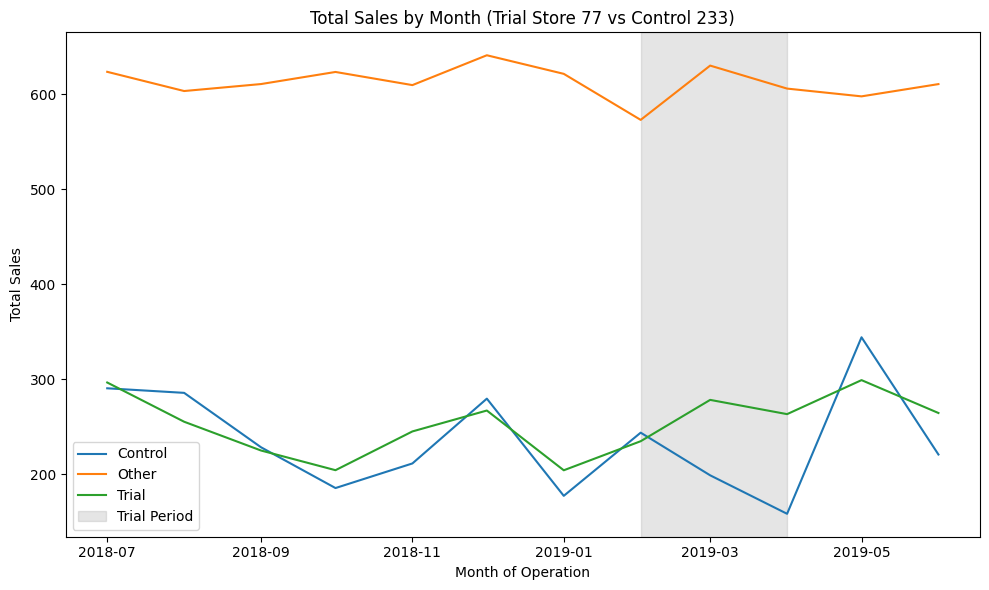

In [ ]:

plot_df=measureOverTimeSales
plot_df['Store_type'] = np.where(plot_df['STORE_NBR'] == trial_store, 
                                 'Trial', 
                                 np.where(plot_df['STORE_NBR'] == control_store, 'Control','Other'))
plot_df = plot_df.groupby(['Store_type','YEARandMONTH'], as_index=False)['TOT_SALES'].mean()

plot_df['TOT_SALES'] = pd.to_numeric(plot_df['TOT_SALES'], errors='coerce')
plot_df.dropna(subset=['TOT_SALES'], inplace=True)
plot_df['YEARandMONTH'] = plot_df['YEARandMONTH'].dt.to_timestamp()

plot_df
plt.figure(figsize=(10,6))
sns.lineplot(data=plot_df, x='YEARandMONTH', y='TOT_SALES', hue='Store_type')
plt.axvspan(pd.to_datetime("2019-02"), pd.to_datetime("2019-04"),
            color='gray', alpha=0.2, label='Trial Period')

plt.title(f"Total Sales by Month (Trial Store {trial_store} vs Control {control_store})")
plt.xlabel("Month of Operation")
plt.ylabel("Total Sales")
plt.legend()
plt.tight_layout()
plt.show()



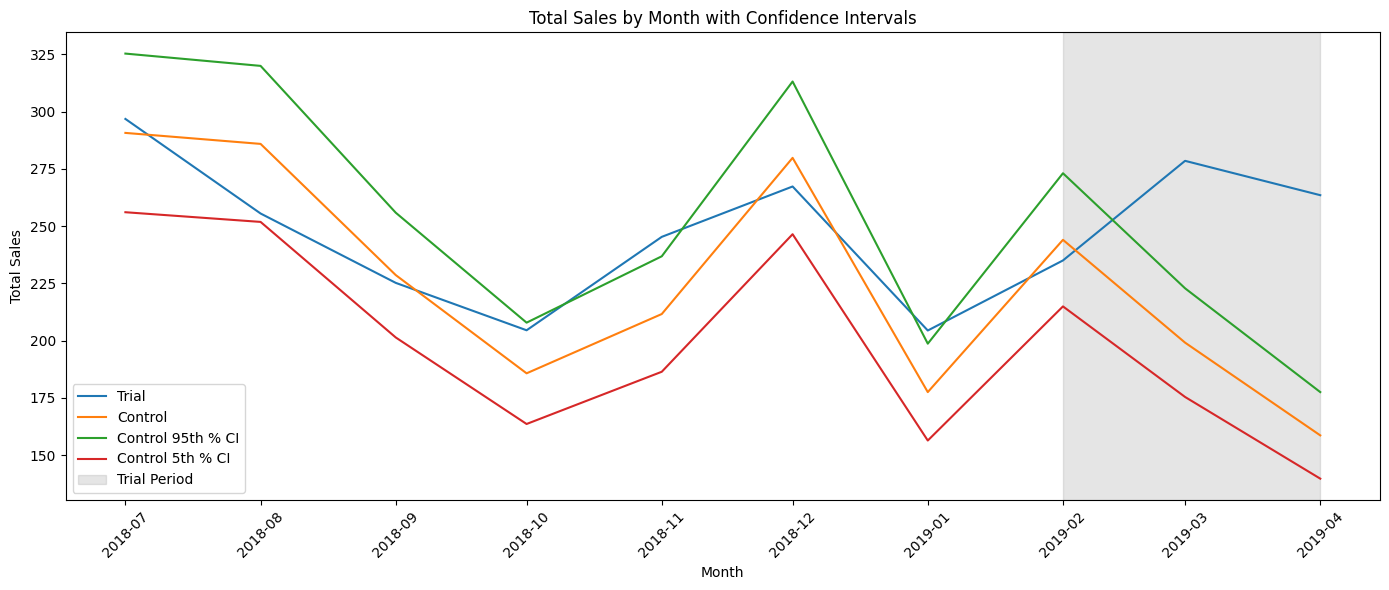

In [ ]:
measureOverTime['YEARandMONTH'] = measureOverTime['YEARandMONTH']


trial_store = 77
control_store = 233
measureOverTime['Store_type'] = np.where(measureOverTime['STORE_NBR'] == trial_store, 'Trial',
                                np.where(measureOverTime['STORE_NBR'] == control_store, 'Control', 'Other'))

pastSales = measureOverTime[
    (measureOverTime['Store_type'].isin(['Trial', 'Control'])) &
    (measureOverTime['YEARandMONTH'] < '2019-05')

].copy()

pastSales['YEARandMONTH']=pastSales['YEARandMONTH'].dt.to_timestamp()

salesComparison = pastSales.pivot(index='YEARandMONTH', columns='Store_type', values='TOT_SALES')
salesComparison['percentageDiff'] = abs(salesComparison['Trial'] - salesComparison['Control']) / salesComparison['Control']
stdDev = salesComparison[salesComparison.index < '2019-02']['percentageDiff'].std()

control_95 = pastSales[pastSales['Store_type'] == 'Control'].copy()
control_95['TOT_SALES'] = control_95['TOT_SALES'] * (1 + 2 * stdDev)
control_95['Store_type'] = 'Control 95th % CI'

control_5 = pastSales[pastSales['Store_type'] == 'Control'].copy()
control_5['TOT_SALES'] = control_5['TOT_SALES'] * (1 - 2 * stdDev)
control_5['Store_type'] = 'Control 5th % CI'


plot_df = pd.concat([pastSales, control_95, control_5])


plt.figure(figsize=(14, 6))
sns.lineplot(data=plot_df, x='YEARandMONTH', y='TOT_SALES', hue='Store_type')
plt.axvspan(pd.to_datetime("2019-02"), pd.to_datetime("2019-04"),
            color='gray', alpha=0.2, label='Trial Period')
plt.title("Total Sales by Month with Confidence Intervals")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

The results show that the trial in store 77 is significantly different to its control store in the trial period as the trial store performance lies outside the 5% to 95% confidence interval of the control store in two of the three trial months.

Let's have a look at assessing this for number of customers as well.

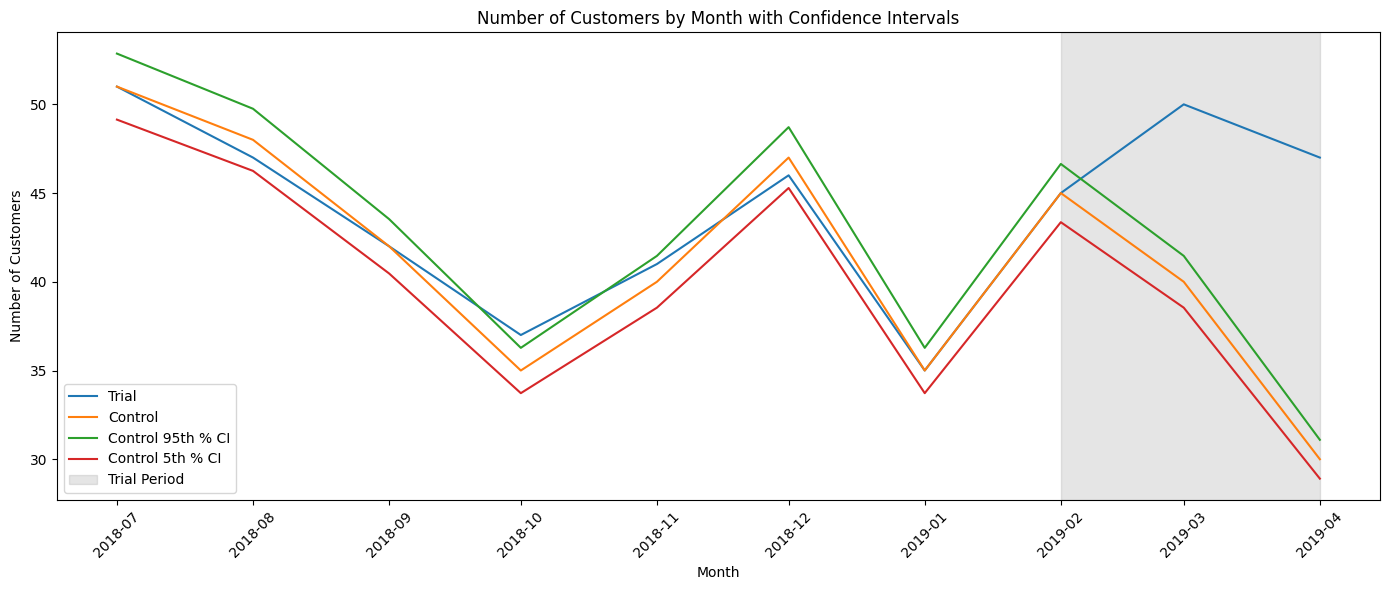

In [ ]:
trial_store = 77
control_store = 233


measureOverTime['Store_type'] = np.where(measureOverTime['STORE_NBR'] == trial_store, 'Trial',
                                np.where(measureOverTime['STORE_NBR'] == control_store, 'Control','Other'))

measureOverTimeCusts = measureOverTime[measureOverTime['Store_type'].isin(['Trial', 'Control'])].copy()


preTrial = measureOverTimeCusts[measureOverTimeCusts['YEARandMONTH'] < '2019-02']
trial_customers = preTrial[preTrial['STORE_NBR'] == trial_store]['nCustomers'].sum()
control_customers = preTrial[preTrial['STORE_NBR'] == control_store]['nCustomers'].sum()
scalingFactorForControlCust = trial_customers / control_customers


scaledControlCusts = measureOverTimeCusts[measureOverTimeCusts['STORE_NBR'] == control_store].copy()
scaledControlCusts['controlCustomers'] = scaledControlCusts['nCustomers'] * scalingFactorForControlCust


trialCusts = measureOverTimeCusts[measureOverTimeCusts['STORE_NBR'] == trial_store][['YEARandMONTH', 'nCustomers']].copy()
trialCusts.rename(columns={'nCustomers': 'trialCustomers'}, inplace=True)

percentageDiff = pd.merge(scaledControlCusts[['YEARandMONTH', 'controlCustomers']], trialCusts, on='YEARandMONTH')
percentageDiff['percentageDiff'] = abs(percentageDiff['controlCustomers'] - percentageDiff['trialCustomers']) / percentageDiff['controlCustomers']

stdDev = percentageDiff[percentageDiff['YEARandMONTH'] < '2019-02']['percentageDiff'].std()


pastCustomers = measureOverTimeCusts.copy()
pastCustomers['YEARandMONTH']=pastCustomers['YEARandMONTH'].dt.to_timestamp()


control_95 = pastCustomers[pastCustomers['Store_type'] == 'Control'].copy()
control_95['nCustomers'] = control_95['nCustomers'] * (1 + 2 * stdDev)
control_95['Store_type'] = 'Control 95th % CI'

control_5 = pastCustomers[pastCustomers['Store_type'] == 'Control'].copy()
control_5['nCustomers'] = control_5['nCustomers'] * (1 - 2 * stdDev)
control_5['Store_type'] = 'Control 5th % CI'


plot_df = pd.concat([
    pastCustomers[pastCustomers['Store_type'] == 'Trial'],
    pastCustomers[pastCustomers['Store_type'] == 'Control'],
    control_95,
    control_5
])
plot_df = plot_df[plot_df['YEARandMONTH'] < '2019-05']


plt.figure(figsize=(14, 6))
sns.lineplot(data=plot_df, x='YEARandMONTH', y='nCustomers', hue='Store_type')
plt.axvspan(pd.to_datetime("2019-02"), pd.to_datetime("2019-04"), color='gray', alpha=0.2, label='Trial Period')
plt.title("Number of Customers by Month with Confidence Intervals")
plt.xlabel("Month")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

It looks like the number of customers is significantly higher in all of the three months. This seems to suggest that the trial had a significant impact on increasing the number of customers in trial store 86 but as we saw, sales were not significantly higher. We should check with the Category Manager if there were special deals in the trial store that were may have resulted in lower prices, impacting the results.

In [34]:
trial_store=86
corr_nSales=calculateCorrelation(preTrialMeasures,'TOT_SALES',trial_store)
corr_nSales

,Store1,Store2,Corr
0,86,1,0.445632
1,86,2,-0.403835
2,86,3,-0.261284
3,86,4,-0.039035
4,86,5,0.235159
...,...,...,...
265,86,268,-0.452182
266,86,269,0.697055
267,86,270,-0.730679
268,86,271,0.527637


In [35]:
corr_nCustomers=calculateCorrelation(preTrialMeasures,'nCustomers',trial_store)
corr_nCustomers

c:\Users\xiaoyuwan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\xiaoyuwan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\xiaoyuwan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\xiaoyuwan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,Store1,Store2,Corr
0,86,1,0.485831
1,86,2,-0.086161
2,86,3,-0.353786
3,86,4,-0.169608
4,86,5,-0.253229
...,...,...,...
265,86,268,-0.034273
266,86,269,-0.098587
267,86,270,-0.767267
268,86,271,0.267393


In [36]:
magnitude_nSales=calculateMagnitudeDistance(preTrialMeasures,'TOT_SALES',trial_store)
magnitude_nSales

,Store1,Store2,Magnitude
0,86,1,0.488334
1,86,2,0.321131
2,86,3,0.507515
3,86,4,0.635654
4,86,5,0.579835
...,...,...,...
265,86,268,0.291930
266,86,269,0.480267
267,86,270,0.517014
268,86,271,0.565665


In [37]:
magnitude_nCustomers=calculateMagnitudeDistance(preTrialMeasures,'nCustomers', trial_store)
magnitude_nCustomers

,Store1,Store2,Magnitude
0,86,1,0.510204
1,86,2,0.428571
2,86,3,0.563025
3,86,4,0.537815
4,86,5,0.714286
...,...,...,...
265,86,268,0.566327
266,86,269,0.581633
267,86,270,0.650794
268,86,271,0.598214


In [38]:
corr_weight=0.5
score_nSales = pd.merge(corr_nSales, magnitude_nSales, on=['Store1','Store2'], how='inner')
score_nSales.columns=['Store1', 'Store2','corr_measure','mag_measure']

score_nSales['scoreNSales'] = (corr_weight*score_nSales['corr_measure'] 
                               + (1-corr_weight)*score_nSales['mag_measure'])

score_nCustomers = pd.merge(corr_nCustomers, magnitude_nCustomers, on=['Store1','Store2'], how='inner')
score_nCustomers.columns=['Store1', 'Store2','corr_measure','mag_measure']
score_nCustomers['scoreNCust'] = (corr_weight*score_nCustomers['corr_measure'] 
                                  + (1-corr_weight)*score_nCustomers['mag_measure'])

score_Control = pd.merge(score_nSales[['Store1','Store2','scoreNSales']], 
                         score_nCustomers[['Store1','Store2','scoreNCust']],
                         on=['Store1','Store2'], how='inner')

score_Control['finalControlScore'] = (score_Control['scoreNSales']*0.5 
                                      + score_Control['scoreNCust']*0.5)

candidate_controls = score_Control[score_Control['Store1'] == trial_store].copy()
candidate_controls = candidate_controls[candidate_controls['Store2'] != trial_store]
candidate_controls.sort_values('finalControlScore', ascending=False, inplace=True)

control_store = candidate_controls.iloc[0]['Store2']  
print(f"Best control store for trial store {trial_store} is {control_store}")


Best control store for trial store 86 is 155.0


C:\Users\xiaoyuwan\AppData\Local\Temp\ipykernel_58328\2254472863.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pastSales['YEARandMONTH']=pastSales['YEARandMONTH'].dt.to_timestamp()


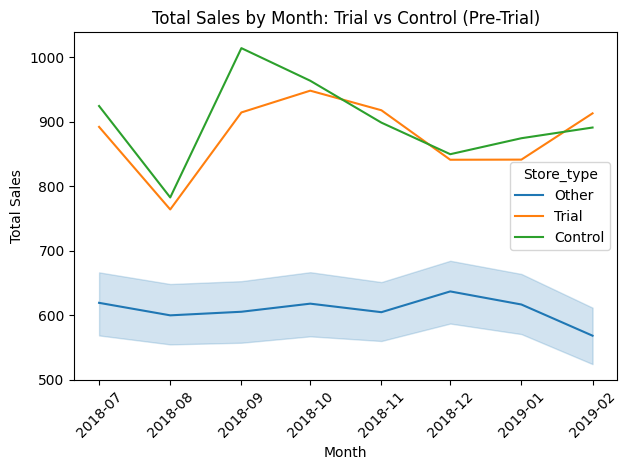

In [40]:
measureOverTime['YEARandMONTH1'] = measureOverTime['YEARandMONTH'].dt.strftime("%Y%m").astype("int")

trial_store = 86
control_store = 155
measureOverTime['Store_type'] = measureOverTime['STORE_NBR'].apply(
    lambda x: 'Trial' if x == trial_store else 'Control' if x == control_store else 'Other'
)


pastSales = measureOverTime[
    
    (measureOverTime['YEARandMONTH'] <'2019-03')
]
pastSales['YEARandMONTH']=pastSales['YEARandMONTH'].dt.to_timestamp()
pastSales

sns.lineplot(data=pastSales, x='YEARandMONTH', y='TOT_SALES', hue='Store_type')
plt.title("Total Sales by Month: Trial vs Control (Pre-Trial)")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



C:\Users\xiaoyuwan\AppData\Local\Temp\ipykernel_58328\116595258.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pastCustomers['YEARandMONTH']=pastCustomers['YEARandMONTH'].dt.to_timestamp()


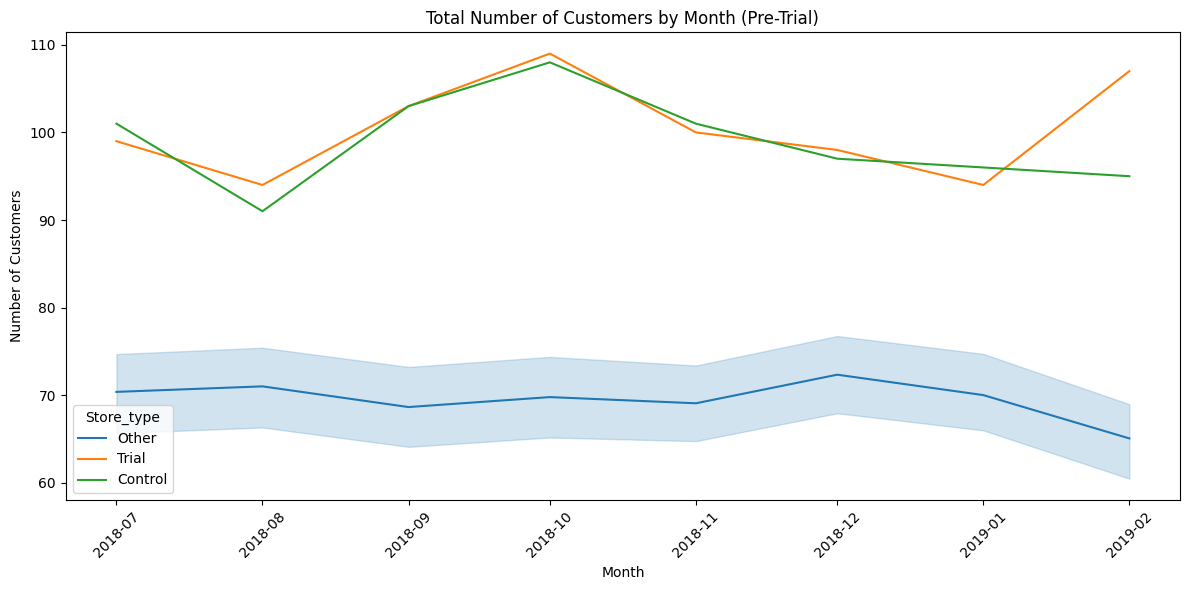

In [41]:
pastCustomers = measureOverTime[
    
    (measureOverTime['YEARandMONTH'] < '2019-03')
]
pastCustomers['YEARandMONTH']=pastCustomers['YEARandMONTH'].dt.to_timestamp()
plt.figure(figsize=(12, 6))
sns.lineplot(data=pastCustomers, x='YEARandMONTH', y='nCustomers', hue='Store_type')
plt.title("Total Number of Customers by Month (Pre-Trial)")
plt.xlabel("Month")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [42]:
preTrialStoreSales = preTrialMeasures.loc[
    (preTrialMeasures['STORE_NBR'] == trial_store),
    'TOT_SALES'
].sum()

preTrialControlSales = preTrialMeasures.loc[
    (preTrialMeasures['STORE_NBR'] == control_store),
    'TOT_SALES'
].sum()

scalingFactorForControlSales = preTrialStoreSales / preTrialControlSales

measureOverTimeSales = measureOverTime.copy()
measureOverTimeSales['controlSales'] = np.where(
    measureOverTimeSales['STORE_NBR'] == control_store,
    measureOverTimeSales['TOT_SALES'] * scalingFactorForControlSales,
    np.nan
)

trialSales = measureOverTimeSales.loc[measureOverTimeSales['STORE_NBR'] == trial_store, 
                                      ['YEARandMONTH','TOT_SALES']].rename(columns={'TOT_SALES':'trialSales'})
controlSales = measureOverTimeSales.loc[measureOverTimeSales['STORE_NBR'] == control_store,
                                        ['YEARandMONTH','controlSales']]

comparison_df = pd.merge(trialSales, controlSales, on='YEARandMONTH', how='inner')


comparison_df['percentageDiff'] = abs(comparison_df['trialSales'] - comparison_df['controlSales']) / comparison_df['controlSales']

comparison_df['YEARandMONTH']=comparison_df['YEARandMONTH'].dt.strftime("%Y%m").astype("int")
pre_trial_mask = comparison_df['YEARandMONTH']<201902
stdDev = comparison_df.loc[pre_trial_mask, 'percentageDiff'].std(ddof=1)
degreesOfFreedom = 7 

trial_mask = (comparison_df['YEARandMONTH'] >= 201902) & (comparison_df['YEARandMONTH'] <= 201904)

trial_period_df = comparison_df[trial_mask].copy()
trial_period_df['tValue'] = (trial_period_df['percentageDiff'] - 0) / stdDev  # hypothetical mu=0

print("\nTrial period comparison (Store", trial_store, "vs Control", control_store, "):")
print(trial_period_df)


Trial period comparison (Store 86 vs Control 155 ):
   YEARandMONTH  trialSales  controlSales  percentageDiff     tValue
7        201902       913.2    864.522060        0.056306   2.179542
8        201903      1026.8    780.320405        0.315870  12.226922
9        201904       848.2    819.317024        0.035253   1.364580


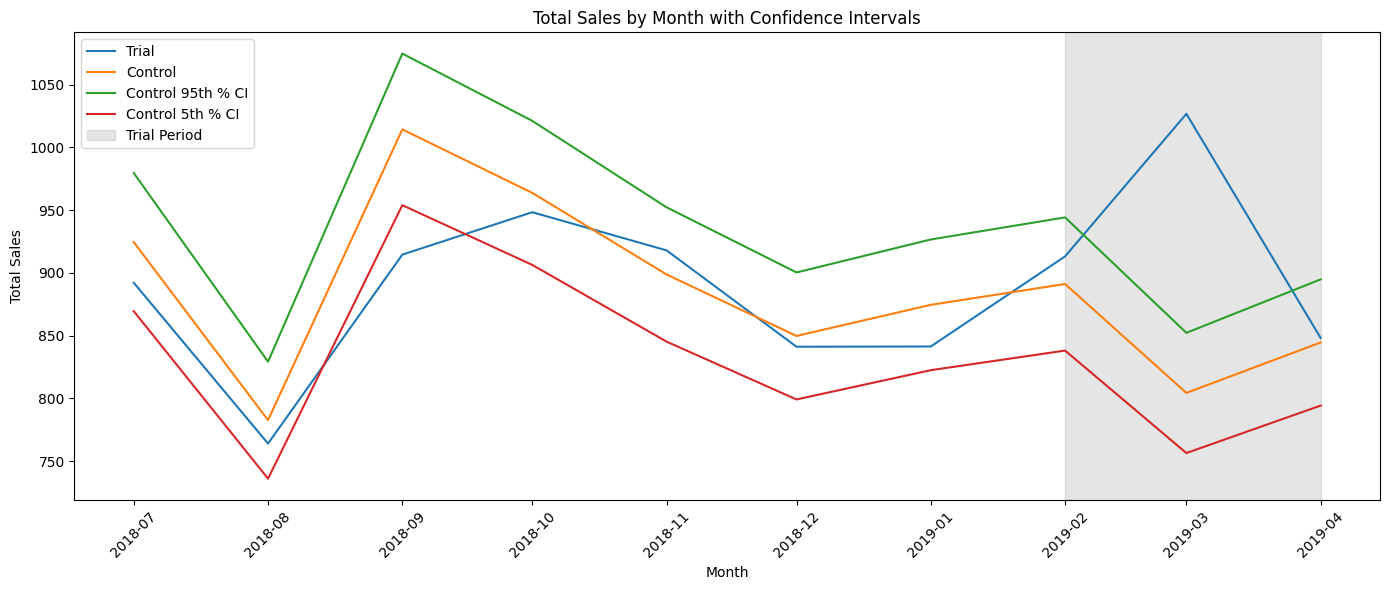

In [43]:
measureOverTime['YEARandMONTH'] = measureOverTime['YEARandMONTH']


trial_store = 86
control_store = 155
measureOverTime['Store_type'] = np.where(measureOverTime['STORE_NBR'] == trial_store, 'Trial',
                                np.where(measureOverTime['STORE_NBR'] == control_store, 'Control', 'Other'))

pastSales = measureOverTime[
    (measureOverTime['Store_type'].isin(['Trial', 'Control'])) &
    (measureOverTime['YEARandMONTH'] < '2019-05')

].copy()

pastSales['YEARandMONTH']=pastSales['YEARandMONTH'].dt.to_timestamp()

salesComparison = pastSales.pivot(index='YEARandMONTH', columns='Store_type', values='TOT_SALES')
salesComparison['percentageDiff'] = abs(salesComparison['Trial'] - salesComparison['Control']) / salesComparison['Control']
stdDev = salesComparison[salesComparison.index < '2019-02']['percentageDiff'].std()

control_95 = pastSales[pastSales['Store_type'] == 'Control'].copy()
control_95['TOT_SALES'] = control_95['TOT_SALES'] * (1 + 2 * stdDev)
control_95['Store_type'] = 'Control 95th % CI'

control_5 = pastSales[pastSales['Store_type'] == 'Control'].copy()
control_5['TOT_SALES'] = control_5['TOT_SALES'] * (1 - 2 * stdDev)
control_5['Store_type'] = 'Control 5th % CI'


plot_df = pd.concat([pastSales, control_95, control_5])


plt.figure(figsize=(14, 6))
sns.lineplot(data=plot_df, x='YEARandMONTH', y='TOT_SALES', hue='Store_type')
plt.axvspan(pd.to_datetime("2019-02"), pd.to_datetime("2019-04"),
            color='gray', alpha=0.2, label='Trial Period')
plt.title("Total Sales by Month with Confidence Intervals")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

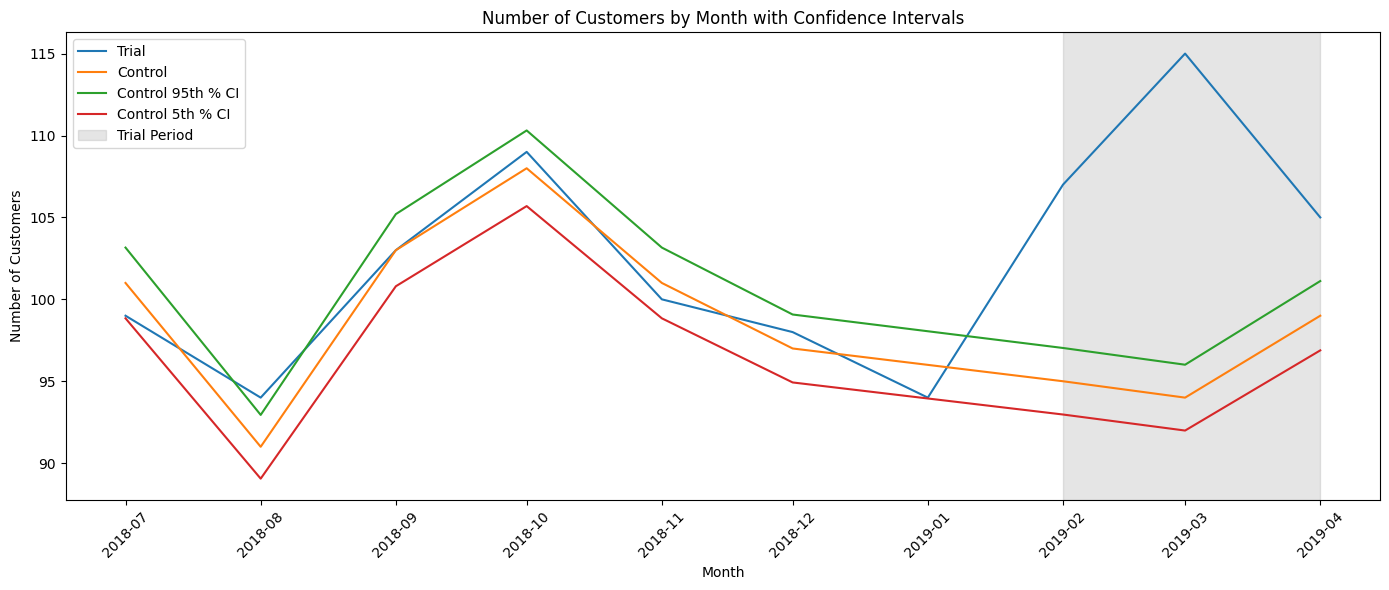

In [44]:
trial_store = 86
control_store = 155


measureOverTime['Store_type'] = np.where(measureOverTime['STORE_NBR'] == trial_store, 'Trial',
                                np.where(measureOverTime['STORE_NBR'] == control_store, 'Control','Other'))

measureOverTimeCusts = measureOverTime[measureOverTime['Store_type'].isin(['Trial', 'Control'])].copy()


preTrial = measureOverTimeCusts[measureOverTimeCusts['YEARandMONTH'] < '2019-02']
trial_customers = preTrial[preTrial['STORE_NBR'] == trial_store]['nCustomers'].sum()
control_customers = preTrial[preTrial['STORE_NBR'] == control_store]['nCustomers'].sum()
scalingFactorForControlCust = trial_customers / control_customers


scaledControlCusts = measureOverTimeCusts[measureOverTimeCusts['STORE_NBR'] == control_store].copy()
scaledControlCusts['controlCustomers'] = scaledControlCusts['nCustomers'] * scalingFactorForControlCust


trialCusts = measureOverTimeCusts[measureOverTimeCusts['STORE_NBR'] == trial_store][['YEARandMONTH', 'nCustomers']].copy()
trialCusts.rename(columns={'nCustomers': 'trialCustomers'}, inplace=True)

percentageDiff = pd.merge(scaledControlCusts[['YEARandMONTH', 'controlCustomers']], trialCusts, on='YEARandMONTH')
percentageDiff['percentageDiff'] = abs(percentageDiff['controlCustomers'] - percentageDiff['trialCustomers']) / percentageDiff['controlCustomers']

stdDev = percentageDiff[percentageDiff['YEARandMONTH'] < '2019-02']['percentageDiff'].std()


pastCustomers = measureOverTimeCusts.copy()
pastCustomers['YEARandMONTH']=pastCustomers['YEARandMONTH'].dt.to_timestamp()


control_95 = pastCustomers[pastCustomers['Store_type'] == 'Control'].copy()
control_95['nCustomers'] = control_95['nCustomers'] * (1 + 2 * stdDev)
control_95['Store_type'] = 'Control 95th % CI'

control_5 = pastCustomers[pastCustomers['Store_type'] == 'Control'].copy()
control_5['nCustomers'] = control_5['nCustomers'] * (1 - 2 * stdDev)
control_5['Store_type'] = 'Control 5th % CI'


plot_df = pd.concat([
    pastCustomers[pastCustomers['Store_type'] == 'Trial'],
    pastCustomers[pastCustomers['Store_type'] == 'Control'],
    control_95,
    control_5
])
plot_df = plot_df[plot_df['YEARandMONTH'] < '2019-05']


plt.figure(figsize=(14, 6))
sns.lineplot(data=plot_df, x='YEARandMONTH', y='nCustomers', hue='Store_type')
plt.axvspan(pd.to_datetime("2019-02"), pd.to_datetime("2019-04"), color='gray', alpha=0.2, label='Trial Period')
plt.title("Number of Customers by Month with Confidence Intervals")
plt.xlabel("Month")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

The following code is for trial store 88

In [45]:
trial_store=77
corr_nSales=calculateCorrelation(preTrialMeasures,'TOT_SALES',trial_store)
corr_nSales

,Store1,Store2,Corr
0,77,1,0.075218
1,77,2,-0.263079
2,77,3,0.806644
3,77,4,-0.263300
4,77,5,-0.110652
...,...,...,...
265,77,268,0.344757
266,77,269,-0.315730
267,77,270,0.315430
268,77,271,0.355487


In [46]:
corr_nCustomers=calculateCorrelation(preTrialMeasures,'nCustomers',trial_store)
corr_nCustomers

c:\Users\xiaoyuwan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\xiaoyuwan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\xiaoyuwan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\xiaoyuwan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,Store1,Store2,Corr
0,77,1,0.322168
1,77,2,-0.572051
2,77,3,0.834207
3,77,4,-0.295639
4,77,5,0.370659
...,...,...,...
265,77,268,0.369517
266,77,269,-0.474293
267,77,270,-0.131259
268,77,271,0.019629


In [47]:
magnitude_nSales=calculateMagnitudeDistance(preTrialMeasures,'TOT_SALES',trial_store)
magnitude_nSales

,Store1,Store2,Magnitude
0,77,1,0.408163
1,77,2,0.590119
2,77,3,0.522914
3,77,4,0.644934
4,77,5,0.516320
...,...,...,...
265,77,268,0.429787
266,77,269,0.559099
267,77,270,0.591547
268,77,271,0.341091


In [48]:
magnitude_nCustomers=calculateMagnitudeDistance(preTrialMeasures,'nCustomers', trial_store)
magnitude_nCustomers

,Store1,Store2,Magnitude
0,77,1,0.663866
1,77,2,0.471429
2,77,3,0.489796
3,77,4,0.498258
4,77,5,0.512605
...,...,...,...
265,77,268,0.571429
266,77,269,0.484472
267,77,270,0.536680
268,77,271,0.328571
